In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
#1.Data Wrangling
df=pd.read_csv(r"AusApparalSales4thQrt2020.csv")
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [3]:
df.isna().sum() #No missing values are ther.Hence no missing value treatment required

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [4]:
#Grouping Data

In [5]:
#Which State has maximum & Minimum sales
State_wise_Data=df.groupby("State")["Sales"].sum()
Max_state=State_wise_Data.idxmax()
Min_state=State_wise_Data.idxmin()
Max_state,Min_state
#Which Group has maximum & Minimum sales
Group_Wise_Data=df.groupby("Group")["Sales"].sum()
Max_Group=Group_Wise_Data.idxmax()
Min_Group=Group_Wise_Data.idxmin()
Max_Group,Min_Group
#Group Statistics
Group_stat=df.groupby("Group")[["Sales","Unit",]].sum()
#Print the detail 
Group_stat,Max_Group,Min_Group,Max_state,Min_state

(            Sales   Unit
 Group                   
 Kids     85072500  34029
 Men      85750000  34300
 Seniors  84037500  33615
 Women    85442500  34177,
 ' Men',
 ' Seniors',
 ' VIC',
 ' WA')

In [6]:
df["Date"]
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['Date']=pd.to_datetime(df['Date'], errors ='coerce')
df['Week']=df['Date'].dt.isocalendar().week
df['qtr']=df['Date'].dt.quarter

Month_wise_sale=df.groupby('month')[['Sales','Unit']].sum()
Week_wise_sale=df.groupby("Week")[['Sales','Unit']].sum()
Quarter_wise_Sale=df.groupby("qtr")[['Sales','Unit']].sum()
Month_wise_sale,Week_wise_sale,Quarter_wise_Sale
df['State'].unique()
dfWA=df.loc[(df['State']==' WA')]
dfTAS=df.loc[(df['State']==' TAS')]
dfNT=df.loc[(df['State']==' NT')]
dfSA=df.loc[(df['State']==' SA')]
dfVIC=df.loc[(df['State']==' VIC')]
dfQLD=df.loc[(df['State']==' QLD')]
dfNSW=df.loc[(df['State']==' NSW')]

#fOR  WA Report:
Month_wise_saleWA=dfWA.groupby('month')[['Sales','Unit']].sum()
Week_wise_saleWA=dfWA.groupby("Week")[['Sales','Unit']].sum()
Quarter_wise_SaleWA=dfWA.groupby("qtr")[['Sales','Unit']].sum()

Month_wise_saleWA,Week_wise_saleWA,Quarter_wise_SaleWA

#fOR  SA Report:
Month_wise_saleSA=dfSA.groupby('month')[['Sales','Unit']].sum()
Week_wise_saleSA=dfSA.groupby("Week")[['Sales','Unit']].sum()
Quarter_wise_SaleSA=dfSA.groupby("qtr")[['Sales','Unit']].sum()

#fOR  VIC Report:
Month_wise_saleVIC=dfVIC.groupby('month')[['Sales','Unit']].sum()
Week_wise_saleVIC=dfVIC.groupby("Week")[['Sales','Unit']].sum()
Quarter_wise_SaleVIC=dfVIC.groupby("qtr")[['Sales','Unit']].sum()

#fOR  TAS Report:
Month_wise_saleTAS=dfTAS.groupby('month')[['Sales','Unit']].sum()
Week_wise_saleTAS=dfTAS.groupby("Week")[['Sales','Unit']].sum()
Quarter_wise_SaleTAS=dfTAS.groupby("qtr")[['Sales','Unit']].sum()












<Axes: xlabel='State', ylabel='Sales'>

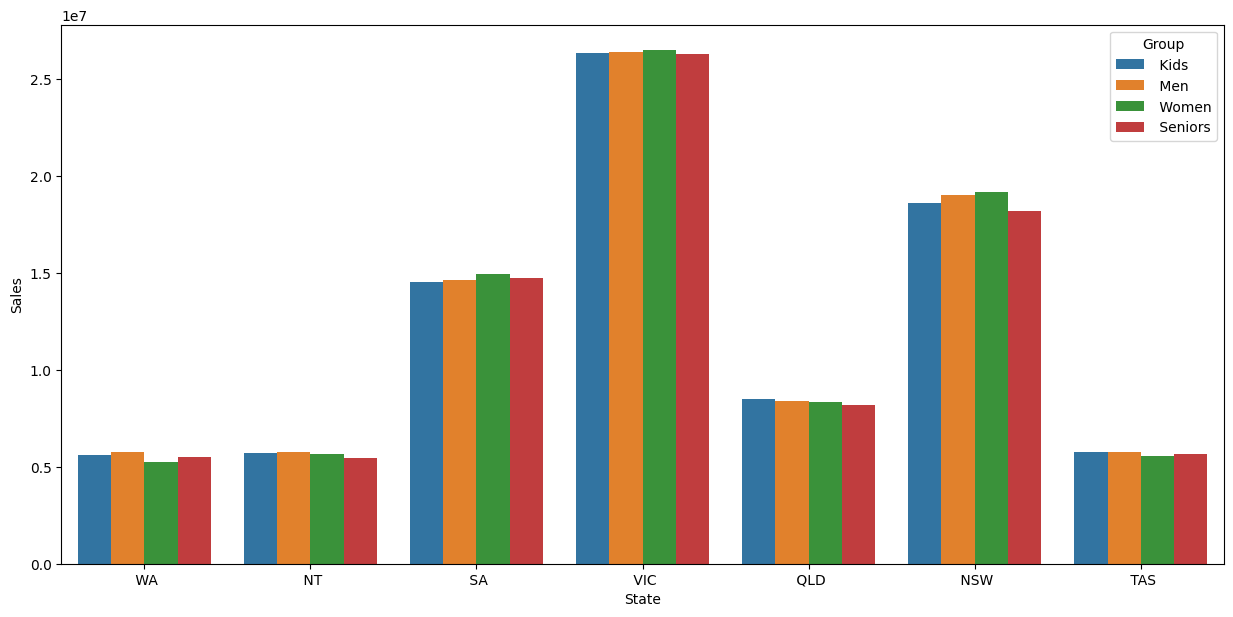

In [7]:
#Data Vosualization
sns.set_style=("whitegrid")
plt.figure(figsize=(15,7))
sns.barplot(data=df,x="State",y="Sales",hue="Group",estimator=sum, errorbar=None)


<Figure size 1500x700 with 0 Axes>

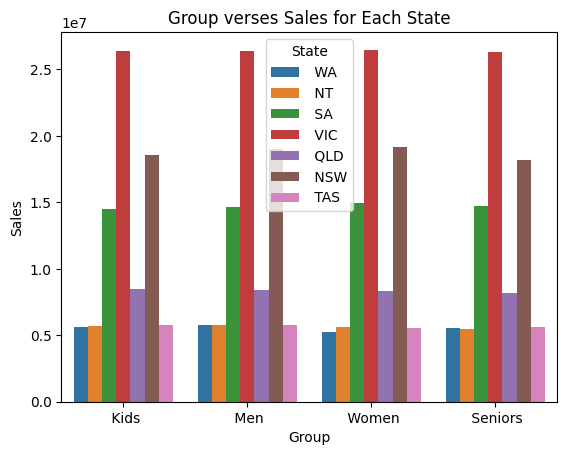

<Figure size 1500x700 with 0 Axes>

In [8]:
sns.barplot(data=df,x="Group",y="Sales",hue="State",estimator=sum, errorbar=None)
plt.title("Group verses Sales for Each State")
plt.figure(figsize=(15,7))

In [9]:
#Daily Sales Analysis
plt.figure(figsize=(35,17))

<Figure size 3500x1700 with 0 Axes>

<Figure size 3500x1700 with 0 Axes>

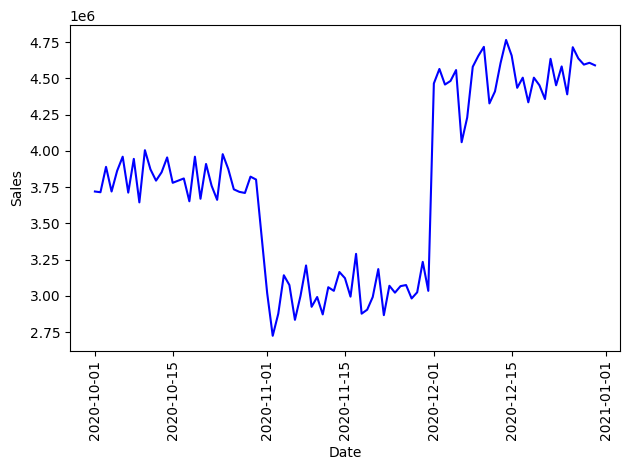

In [10]:
sns.lineplot(data=df,x="Date",y="Sales",estimator=sum,errorbar=None,color="Blue")
plt.xticks(rotation=90)
plt.tight_layout()

<Axes: xlabel='month', ylabel='Sales'>

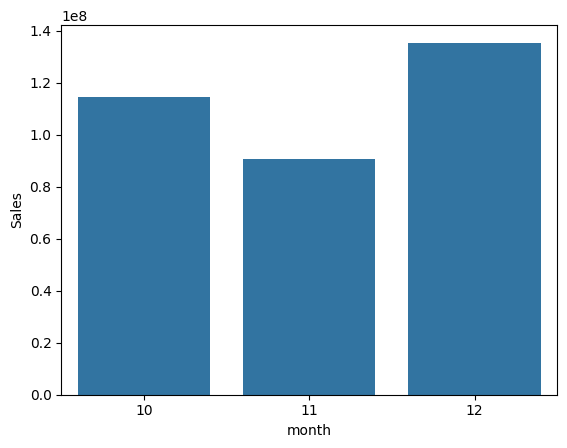

In [23]:
#Month_wise_sale,Week_wise_sale,Quarter_wise_Sale
Month_wise_sale.head()

sns.barplot(data=Month_wise_sale,x="month",y="Sales",estimator=sum, errorbar=None)


<Axes: xlabel='Week', ylabel='Sales'>

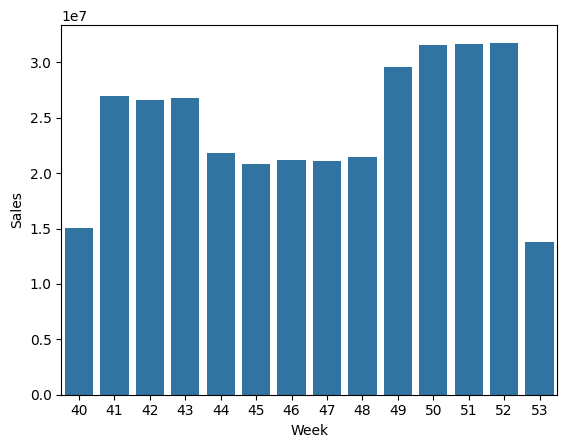

In [25]:
sns.barplot(data=Week_wise_sale,x="Week",y="Sales",estimator=sum,errorbar=None)

<Axes: xlabel='qtr', ylabel='Sales'>

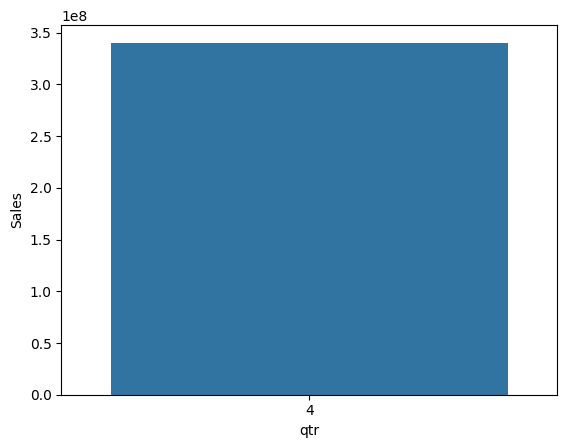

In [29]:
sns.barplot(data=Quarter_wise_Sale,x="qtr",y="Sales",estimator=sum,errorbar=None)

In [27]:
Quarter_wise_Sale.head()

,Sales,Unit
qtr,,
4,340302500,136121


<Axes: >

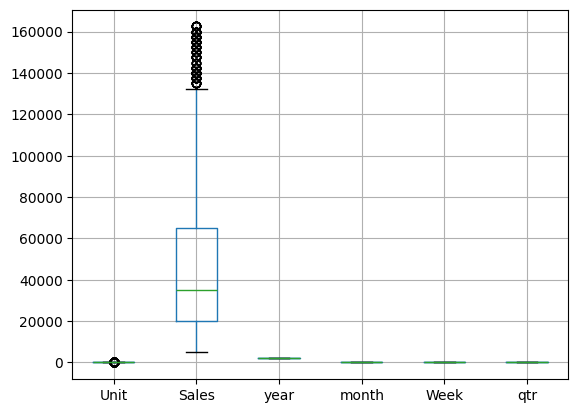

In [31]:
df.boxplot()

<Axes: xlabel='State', ylabel='Sales'>

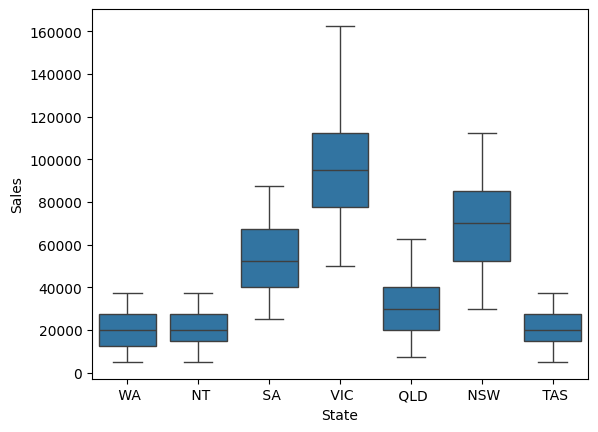

In [32]:
sns.boxplot(data=df, x="State", y="Sales")

<Axes: xlabel='Group', ylabel='Sales'>

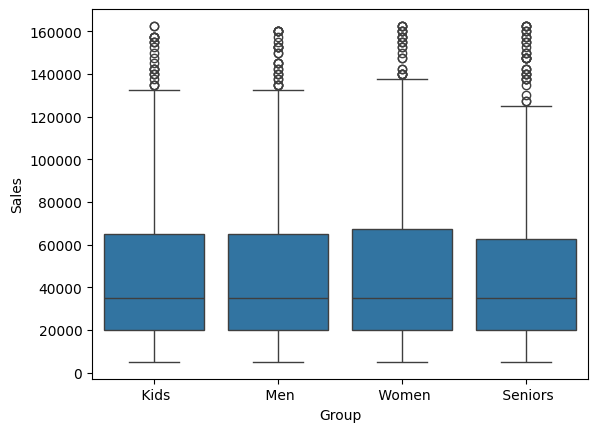

In [33]:
sns.boxplot(data=df, x="Group", y="Sales")

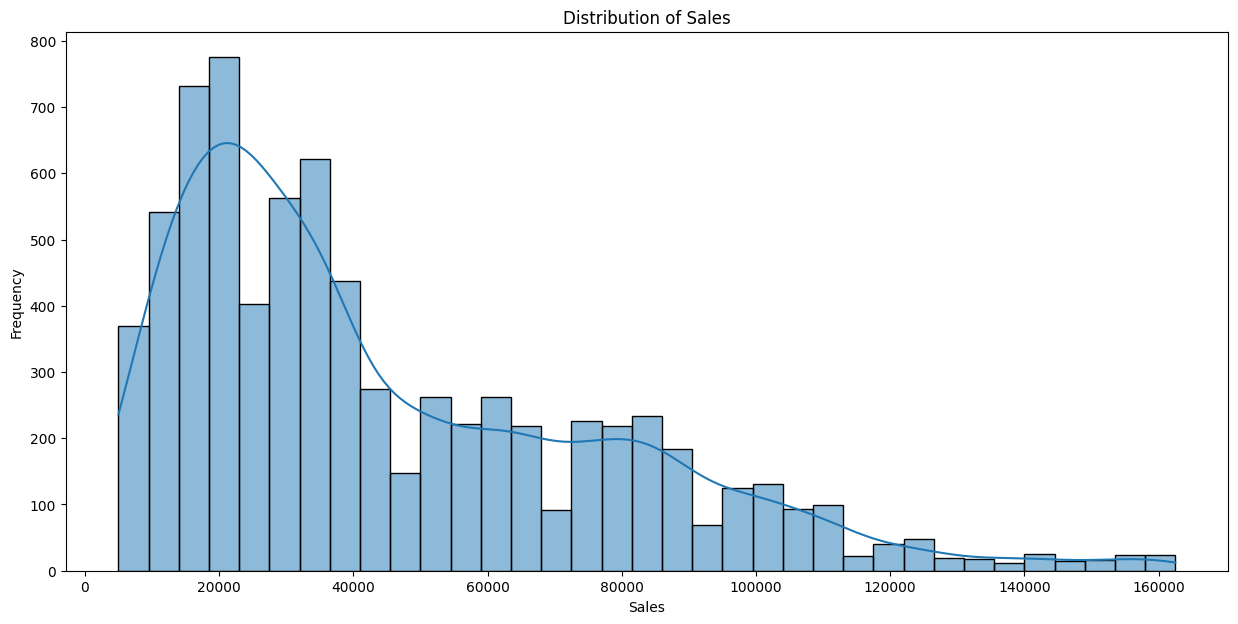

In [34]:
plt.figure(figsize=(15, 7))
sns.histplot(df['Sales'], kde=True)
plt.title("Distribution of Sales")
plt.ylabel("Frequency")
plt.xlabel("Sales")
plt.show()